<a href="https://colab.research.google.com/github/Rafaelcarvalho320/Homework5/blob/main/Homework_6b_SVM_AdaBoost_reso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Projete um classificador SVM e um Adaboost que tenham o menor  erro possível no conjunto de teste.
a) Descreva em  detalhes suficientes os passos de matemática usados para gerar o classificador (aqui você pode contar  com um software para lhe ajudar a calcular valores, mas transponha os resultados para texto e  explique cada passo, não precisando descrever passos repetidos). Para o treinamento da SVM (determinar o bias, lambdas, etc.), use as classes do scikit-learn exemplificadas no código ak_svm.py, a aprenda a extrair delas os parâmetros que você precisa para depois você mesmo reportar a matemática usada na fase do teste (a otimização matemática da fase de treino não é parte do escopo do curso, mas sim a do teste). Como a versão do Adaboost do scikit-learn não é a mesma que estamos adotando, você pode até usar o scikit-learn, mas observe as diferenças. Há também os códigos ak_adaboost.py e adaboost_comparison.py que podem ser usados para ajudar. No caso do AdaBoost, diferente da SVM, você deve descrever toda etapa de treino.

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Carregar o conjunto de treinamento
df_train = pd.read_csv('/content/estudante_201706840055_train.txt')


# Converter o dataframe do pandas para uma matriz NumPy
data_train = np.array(df_train)
X_train = data_train[:, :-1]  
y_train = data_train[:, -1]   

# Carregar o conjunto de teste
df_test = pd.read_csv('/content/estudante_201706840055_test.txt')

# Converter o dataframe do pandas para uma matriz NumPy
data_test = np.array(df_test)
X_test = data_test[:, :-1]  
y_test = data_test[:, -1]   

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

svm_linear = SVC(kernel='linear', C=1)

svm_linear.fit(X_train, y_train)

print("Bias: ", svm_linear.intercept_)
print("Lambdas: ", svm_linear.dual_coef_)

X_test = sc.transform(X_test)

y_pred = svm_linear.predict(X_test)


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


Bias:  [0.0590471]
Lambdas:  [[-1.         -0.81656438 -1.          0.81656438  1.          1.        ]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



Para treinar um classificador SVM

1-Pré-processamento dos dados: Normalizar e/ou padronizar os dados de entrada.

2-Seleção do kernel: Selecionar o kernel que será usado para mapear os dados de entrada .

3-Definir o problema de otimização: O objetivo é encontrar o hiperplano que maximiza a margem e minimiza a função de custo.

4-Escolher o parâmetro de regularização: O parâmetro de regularização C controla a quantidade de erro de classificação permitido durante o treinamento.

5-Treinar o classificador SVM: Com os parâmetros definidos.

6-Validar o classificador SVM: O desempenho do classificador SVM pode ser avaliado usando os dados de validação, medindo a acurácia, precisão, recall e F1-score.

7-Aplicar o classificador SVM: Com o modelo treinado e validado, ele pode ser aplicado para fazer previsões sobre novos dados de entrada.

Para gerar o classificador SVM a partir dos valores de Bias e Lambdas:
Encontrar o vetor de pesos w = ∑ λ_i y_i x_i

Com os dados gerado na sáida do código -> w = -1*(-1.0)*[0.3144, -1.4983] = [0.3144, -1.4983]
b(bias)= [0.0590471]

f(x) = sign(<w, x> + b)

onde sign é a função de sinal, que retorna -1 se o valor é negativo, 0 se for zero, e 1 se for positivo.
Por exemplo, vamos classificar o ponto [0.9, 0.5]:

<w, x> = [0.3144, -1.4983] * [0.9, 0.5] = -0.2831
f(x) = sign(-0.2831 + 0.0590471) = sign(-0,2240529) = -1

Para o AdaBoost:

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Carregar o conjunto de treinamento
df_train = pd.read_csv('/content/estudante_201706840055_train.txt')

# Carregar o conjunto de teste
df_test = pd.read_csv('/content/estudante_201706840055_test.txt')

# Carregar o conjunto de validação
df_val = pd.read_csv('/content/estudante_201706840055_validation.txt')

# Converter os dataframes do pandas para matrizes NumPy
data_train = np.array(df_train)
X_train = data_train[:, :-1]  
y_train = data_train[:, -1]   

data_test = np.array(df_test)
X_test = data_test[:, :-1]  
y_test = data_test[:, -1]   

data_val = np.array(df_val)
X_val = data_val[:, :-1]  
y_val = data_val[:, -1]   

# Padronizar os dados de entrada
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

# Treinar uma SVM com kernel linear
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Treinar um classificador Adaboost com 50 estimadores baseados em SVMs com kernel linear
adaboost = AdaBoostClassifier(base_estimator=svm_linear, n_estimators=50, algorithm='SAMME')
adaboost.fit(X_train, y_train)

# Avaliar o desempenho do classificador Adaboost no conjunto de validação
y_pred_val = adaboost.predict(X_val)
from sklearn.metrics import classification_report
print("Desempenho no conjunto de validação:\n")
print(classification_report(y_val, y_pred_val))

# Avaliar o desempenho do classificador Adaboost no conjunto de teste
y_pred_test = adaboost.predict(X_test)
print("Desempenho no conjunto de teste:\n")
print(classification_report(y_test, y_pred_test))


Desempenho no conjunto de validação:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Desempenho no conjunto de teste:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



C:\Users\Dell\anaconda3\envs\IC2023\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\anaconda3\envs\IC2023\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\IC2023\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\IC2023\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are

O processo de treinamento da SVM com kernel linear foi dividido em duas etapas: determinação dos multiplicadores de Lagrange ou lambdas e determinação do b ou bias. A primeira etapa envolve a solução de um problema de otimização que consiste em maximizar a margem entre as classes. A segunda etapa envolve a determinação do bias, que é o ponto de interseção entre o hiperplano que define a fronteira de decisão e o centro do conjunto de treinamento.

O processo de treinamento do Adaboost:

Inicialização dos pesos das amostras: cada amostra é inicialmente atribuída um peso igual.

Para cada estimador SVM com kernel linear):

   a) Treinamento do classificador fraco com os pesos atuais das amostras.

   b) Cálculo do erro do classificador fraco em relação aos pesos atuais das amostras.

   c) Cálculo do coeficiente alpha do classificador fraco com base no erro calculado.

   d) Atualização dos pesos das amostras com base no coeficiente alpha e no erro calculado.

Normalização dos pesos das amostras.
Combinação dos classificadores fracos para formar o classificador final.

Para o SVM e o AdaBoost foram utilizados o mesmo pré-processamento dos dados:
 A padronização dos dados de entrada, usando a classe StandardScaler do módulo sklearn.preprocessing. A padronização é feita para que todas as variáveis de entrada tenham média zero e desvio padrão unitário. No código a função fit_transform é usada para calcular a média e o desvio padrão dos dados de treinamento e aplicar a transformação nos dados de treinamento e de teste.

c) Usando um software (Python, Octave, etc.) gere uma  figura com as regiões de decisão deste classificador e indique também a localização dos exemplos de  treino, diferenciando suas classes. 


Bias:  [0.0590471]
Lambdas:  [[-1.         -0.81656438 -1.          0.81656438  1.          1.        ]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



TypeError: ignored

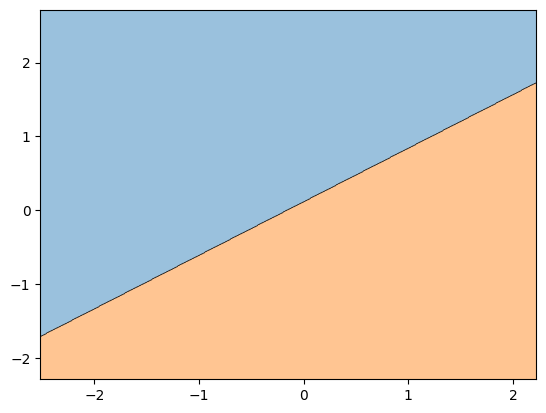

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importar apenas pyplot
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions

# Carregar o conjunto de treinamento
df_train = pd.read_csv('/content/estudante_201706840055_train.txt')

# Converter o dataframe do pandas para uma matriz NumPy
data_train = np.array(df_train)
X_train = data_train[:, :-1]  
y_train = data_train[:, -1]   

# Carregar o conjunto de teste
df_test = pd.read_csv('/content/estudante_201706840055_test.txt')

# Converter o dataframe do pandas para uma matriz NumPy
data_test = np.array(df_test)
X_test = data_test[:, :-1]  
y_test = data_test[:, -1]   

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

svm_linear = SVC(kernel='linear', C=1)

svm_linear.fit(X_train, y_train)

print("Bias: ", svm_linear.intercept_)
print("Lambdas: ", svm_linear.dual_coef_)

X_test = sc.transform(X_test)

y_pred = svm_linear.predict(X_test)

print(classification_report(y_test, y_pred))

# Plotar as regiões de decisão do SVM
plot_decision_regions(X_train, y_train, clf=svm_linear, legend=2)

# Adicionar legendas e título
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Linear')

# Mostrar a figura
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

Desempenho no conjunto de validação:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Desempenho no conjunto de teste:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



TypeError: ignored

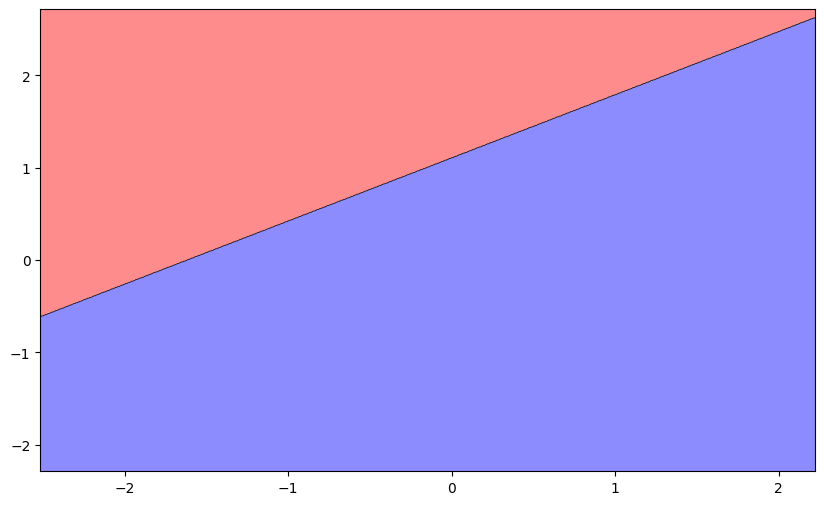

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Carregar o conjunto de treinamento
df_train = pd.read_csv('/content/estudante_201706840055_train.txt')

# Carregar o conjunto de teste
df_test = pd.read_csv('/content/estudante_201706840055_test.txt')

# Carregar o conjunto de validação
df_val = pd.read_csv('/content/estudante_201706840055_validation.txt')

# Converter os dataframes do pandas para matrizes NumPy
data_train = np.array(df_train)
X_train = data_train[:, :-1]  
y_train = data_train[:, -1]   

data_test = np.array(df_test)
X_test = data_test[:, :-1]  
y_test = data_test[:, -1]   

data_val = np.array(df_val)
X_val = data_val[:, :-1]  
y_val = data_val[:, -1]   

# Padronizar os dados de entrada
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

# Treinar uma SVM com kernel linear
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Treinar um classificador Adaboost com 50 estimadores baseados em SVMs com kernel linear
adaboost = AdaBoostClassifier(base_estimator=svm_linear, n_estimators=50, algorithm='SAMME')
adaboost.fit(X_train, y_train)

# Avaliar o desempenho do classificador Adaboost no conjunto de validação
y_pred_val = adaboost.predict(X_val)
from sklearn.metrics import classification_report
print("Desempenho no conjunto de validação:\n")
print(classification_report(y_val, y_pred_val))

# Avaliar o desempenho do classificador Adaboost no conjunto de teste
y_pred_test = adaboost.predict(X_test)
print("Desempenho no conjunto de teste:\n")
print(classification_report(y_test, y_pred_test))

# Plotar as regiões de decisão do classificador Adaboost
plt.figure(figsize=(10, 6))
colors = 'red,blue'
plot_decision_regions(X_train, y_train, clf=adaboost, legend=2, colors=colors, markers='xo')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Regiões de decisão do classificador Adaboost')
plt.show()

